In [ ]:
! pip install -q kaggle

In [ ]:
!gdown --id 1ipxJ14exucrJEPKnWXgXZUEG4R6LZXm1

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ipxJ14exucrJEPKnWXgXZUEG4R6LZXm1
To: /content/kaggle.json
100% 72.0/72.0 [00:00<00:00, 430kB/s]


In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [02:53<00:00, 30.7MB/s]
100% 5.20G/5.20G [02:53<00:00, 32.2MB/s]


In [ ]:
! unzip skin-cancer-mnist-ham10000

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [ ]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
from imblearn.over_sampling import RandomOverSampler
import imblearn
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters


# load the dataset

In [ ]:
import pandas as pd
data = pd.read_csv('/content/hmnist_28_28_RGB.csv')
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [ ]:
data.columns

Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)

In [ ]:
data.isnull().any().sum()

0

In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

In [ ]:
tabular_data = pd.read_csv('/content/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
#classes = {'mel':0 ,'vasc':1,'df':2,'nv':3,'bkl':4,'bcc':5,'ak':6}

#### exploratory data analysis

Text(0.5, 1.0, 'Frequency Distribution of Classes')

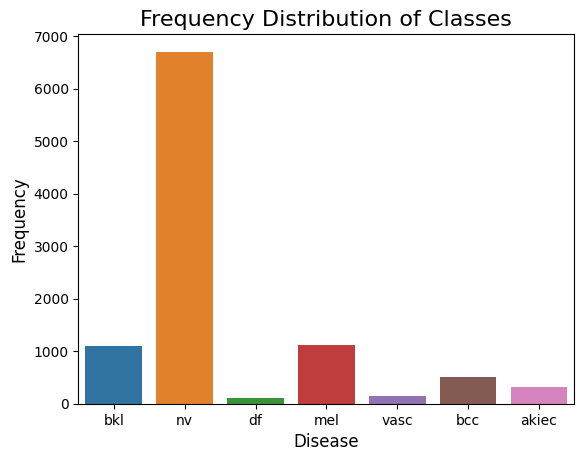

In [ ]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

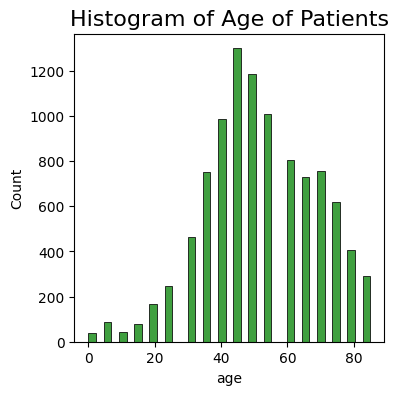

In [ ]:
bar, ax = plt.subplots(figsize=(4,4))
sns.histplot(tabular_data['age'], color='green')
plt.title('Histogram of Age of Patients', size=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

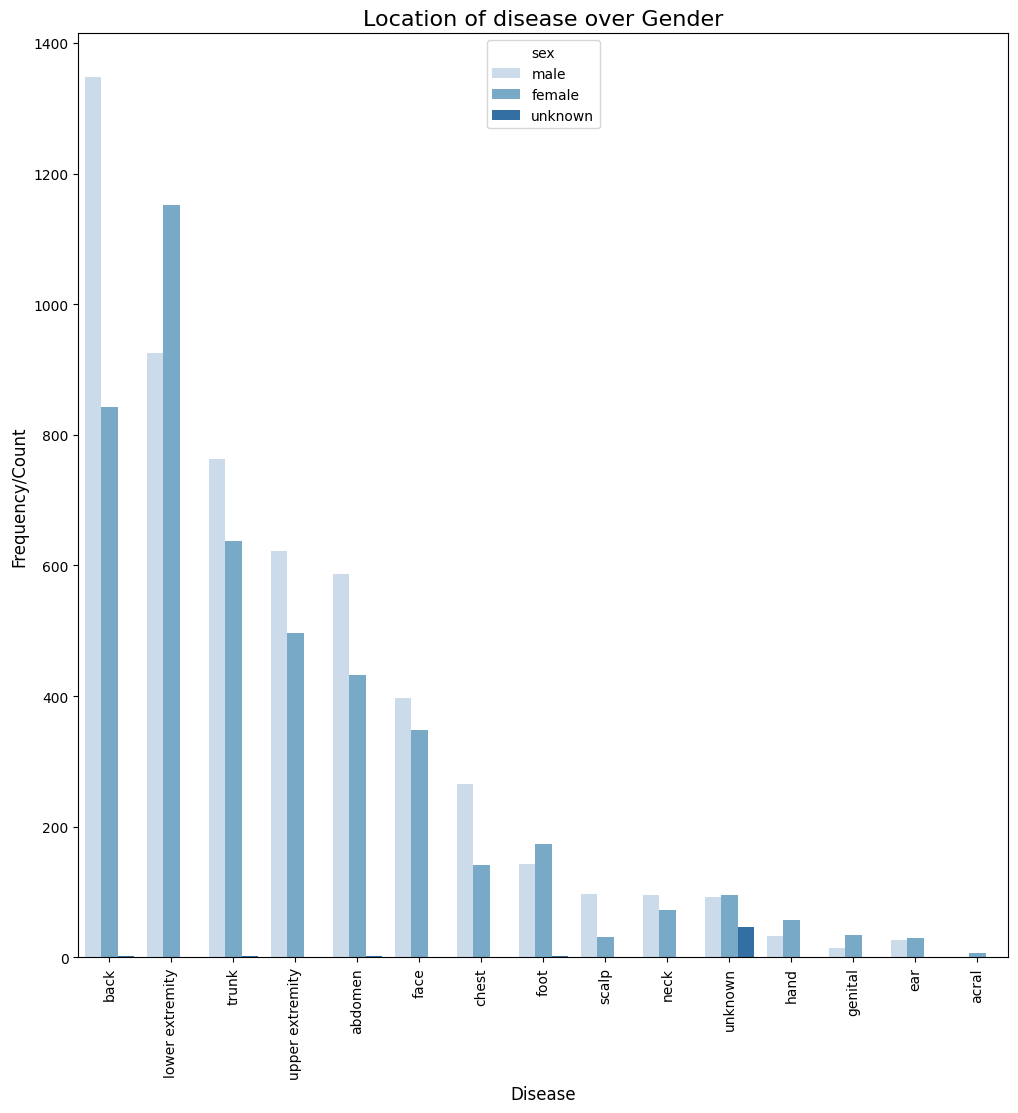

In [ ]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
palette=dict(female='pink', male='blue')
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp, palette='Blues')
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
x= np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [ ]:
y = to_categorical(y)

In [ ]:
y.shape

(46935, 7)

In [ ]:
x = (x-np.mean(x))/np.std(x)

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
Y_train.shape

(37548, 7)

###### MODEL BUILDING
Blockred function (Inception-style feature extraction block combining multiple CNN techniques within each branch.)

In [ ]:
def blockred(inp,filters):
    #Inception
    x = Conv2D(filters, 1, activation="relu",padding='same',use_bias=False)(inp)
    x = layers.MaxPooling2D(2)(x)
    x = BatchNormalization(axis=1)(x)

    #VGG + SQuizenet
    y = Conv2D(filters*2,3,activation="relu", padding='same',use_bias=False,)(inp)
    y = Conv2D(filters,3,activation="relu", padding='same',use_bias=False,)(y)
    y = layers.MaxPooling2D(2)(y)
    y = BatchNormalization(axis=1)(y)
    y = Dropout(0.25)(y)

    #InceptionResnet+Squize
    z = Conv2D(filters*2, 3, activation="relu", padding='same',use_bias=False)(inp)
    z = Conv2D(filters, 1, activation="relu", padding='same',use_bias=False)(inp)
    z = layers.MaxPooling2D(2)(z)
    z = BatchNormalization(axis=1)(z)
    output1 = layers.add([x,y,z])
    return output1

In [ ]:
# pretrained custom model

In [ ]:
Name= "CNN0"
inputs = keras.Input(shape=(28,28,3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)

bl1=blockred(x,32)

bl2=blockred(bl1,64)

bl3=blockred(bl2,64)
y = Flatten()(bl3)
y = Dense(256, activation='relu')(y)
y = Dropout(0.5)(y)
y = Dense(64, activation='relu')(y)
y = Dropout(0.5)(y)
outputs=Dense(7, activation='softmax')(y)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())

Model: "CNN0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_2 (Conv2D)              (None, 26, 26, 64)   18432       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 26, 26, 32)   18432       ['conv2d_2[0][0]']               
                                                                                               

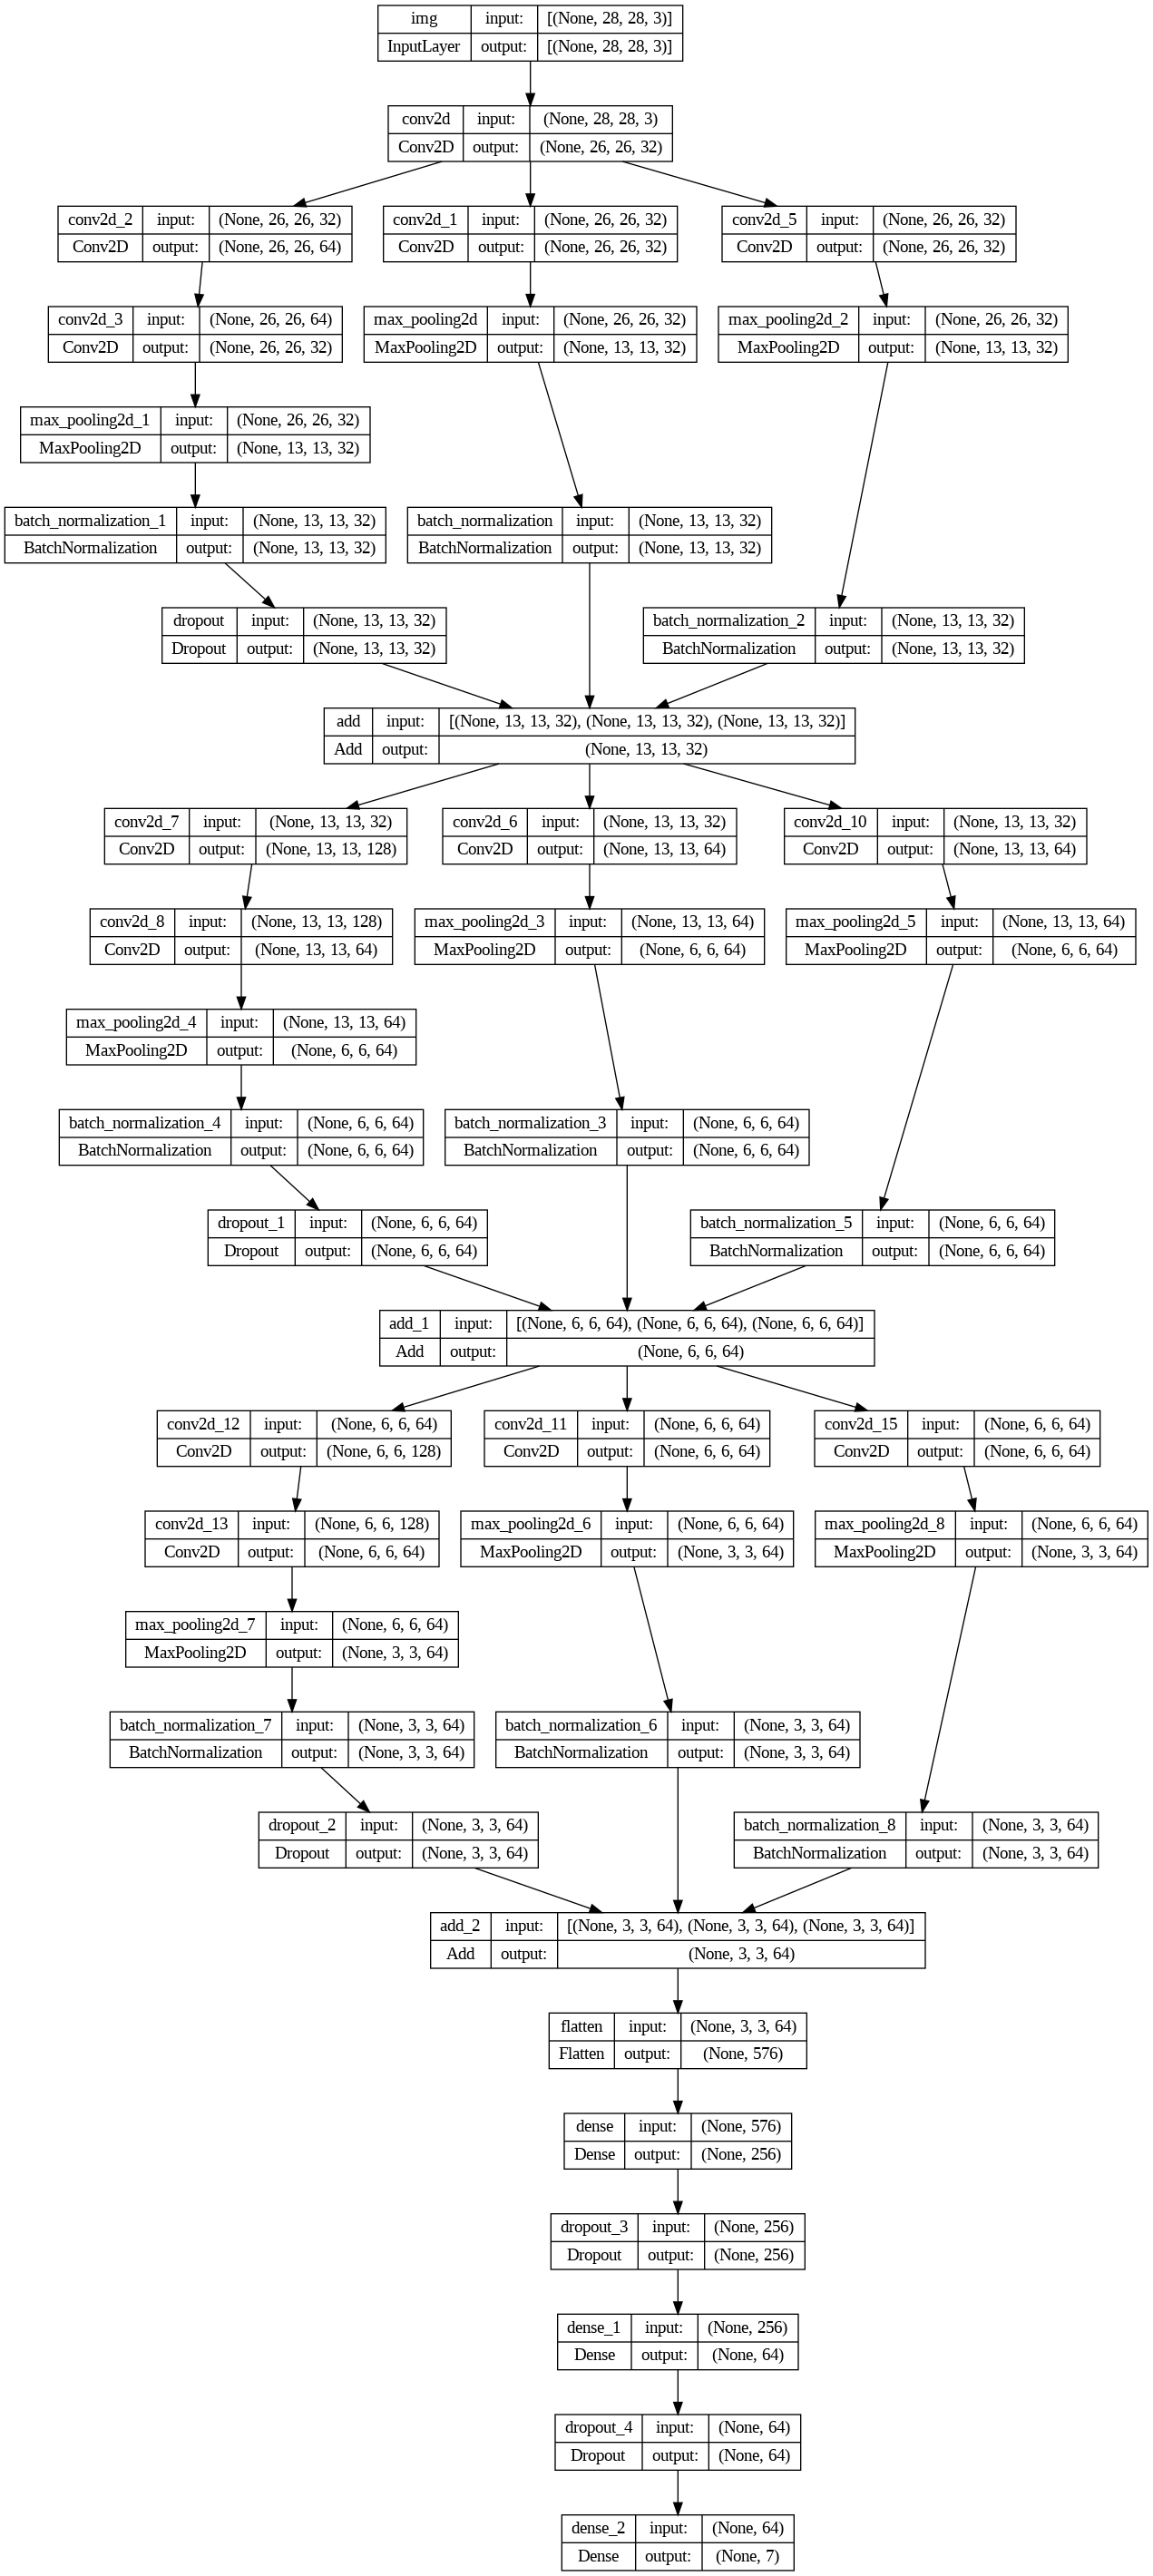

In [ ]:
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy() ,
              metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test), batch_size=512, callbacks=[callback])

Epoch 1/30
74/74 [==============================] - ETA: 0s - loss: 1.9220 - acc: 0.2445 - recall: 0.0348 - precision: 0.3530 - auc: 0.6483 - true_positives: 1307.0000 - true_negatives: 222892.0000 - false_negatives: 36241.0000 - false_positives: 2396.0000
Epoch 1: saving model to best_model.h5
74/74 [==============================] - 20s 55ms/step - loss: 1.9220 - acc: 0.2445 - recall: 0.0348 - precision: 0.3530 - auc: 0.6483 - true_positives: 1307.0000 - true_negatives: 222892.0000 - false_negatives: 36241.0000 - false_positives: 2396.0000 - val_loss: 1.6566 - val_acc: 0.3603 - val_recall: 0.0469 - val_precision: 0.6423 - val_auc: 0.7433 - val_true_positives: 440.0000 - val_true_negatives: 56077.0000 - val_false_negatives: 8947.0000 - val_false_positives: 245.0000
Epoch 2/30
73/74 [============================>.] - ETA: 0s - loss: 1.5175 - acc: 0.4081 - recall: 0.1646 - precision: 0.6681 - auc: 0.7944 - true_positives: 6152.0000 - true_negatives: 221200.0000 - false_negatives: 31224.

In [ ]:
model.save(Name+'.h5')

pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)

###### plotting model accuracy and loss

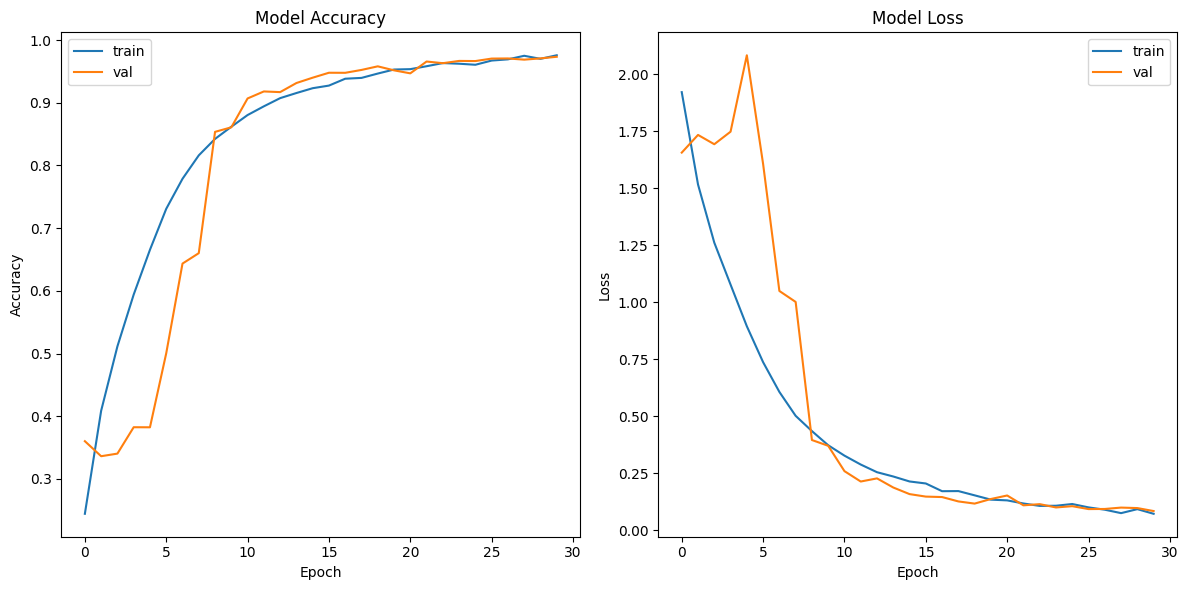

In [ ]:
plt.figure(figsize=(12, 6))

# Plot Model accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Model loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=1)[:2]

294/294 [==============================] - 2s 6ms/step - loss: 0.0836 - acc: 0.9734 - recall: 0.9734 - precision: 0.9739 - auc: 0.9978 - true_positives: 9137.0000 - true_negatives: 56077.0000 - false_negatives: 250.0000 - false_positives: 245.0000


###### saving the best model

In [ ]:
model.save_weights('best_model_weights.h5')

294/294 [==============================] - 1s 3ms/step


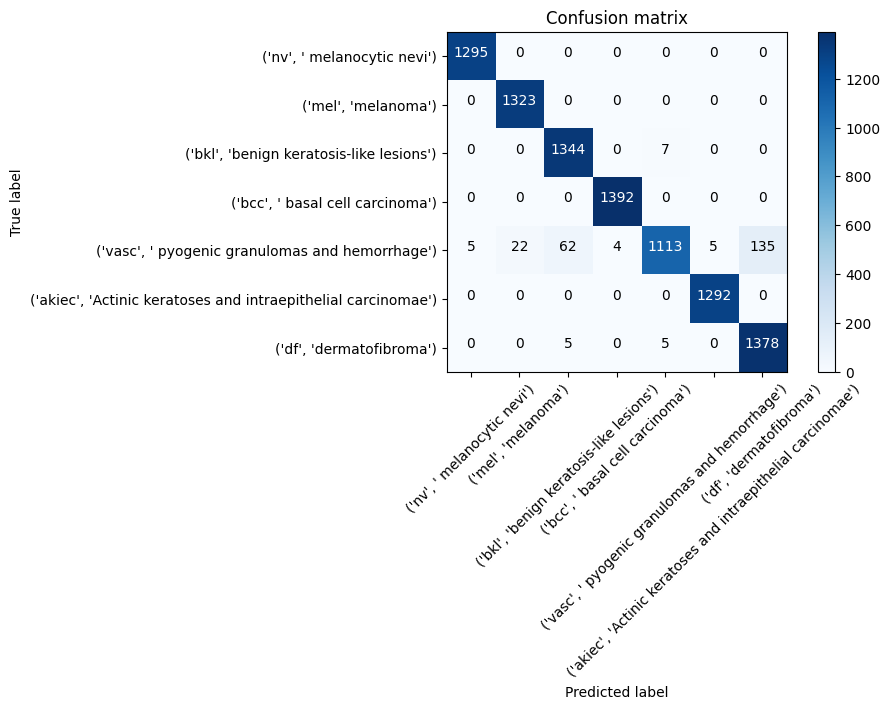

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    fig, ax = plt.subplots(figsize = (10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
confusion_mtx = confusion_matrix(np.argmax(Y_test,axis=1), Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values())

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
Y_pred = np.argmax(model.predict(X_test),axis=1)
print(classification_report(np.float32(np.argmax(Y_test,axis=1)), Y_pred.round()))
print('Classification Report')

294/294 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1295
         1.0       0.98      1.00      0.99      1323
         2.0       0.95      0.99      0.97      1351
         3.0       1.00      1.00      1.00      1392
         4.0       0.99      0.83      0.90      1346
         5.0       1.00      1.00      1.00      1292
         6.0       0.91      0.99      0.95      1388

    accuracy                           0.97      9387
   macro avg       0.98      0.97      0.97      9387
weighted avg       0.97      0.97      0.97      9387

Classification Report


In [ ]:
# transfer learning

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.efficientnet import EfficientNetB7

In [ ]:
X_train_pad= np.pad(X_train,((0,0),(2,2),(2,2),(0,0)),'mean')

In [ ]:
X_test_pad= np.pad(X_test,((0,0),(2,2),(2,2),(0,0)),'mean')

##### transfer learning pipeline

In [ ]:

img_shape =(32,32,3)

Name= "ResNet"
classifier = ResNet152V2(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 555
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

Name= "EfficientNetB7"
classifier = EfficientNetB7(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 790
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

Name= "VGG19"
classifier = VGG19(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )

fine_tune_at = 20
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
print(model.summary())


80134624/80134624 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                         

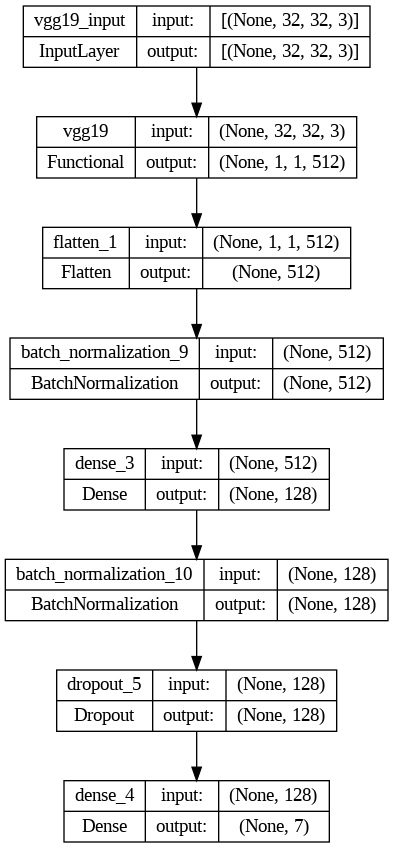

In [ ]:
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_Resnet.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy() ,
              metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
history = model.fit(X_train_pad, Y_train, epochs=30, validation_data=(X_test_pad, Y_test), batch_size=512, callbacks=[callback])

Epoch 1/30
74/74 [==============================] - ETA: 0s - loss: 1.1955 - acc: 0.5892 - recall_1: 0.4945 - precision_1: 0.6740 - auc_1: 0.8886 - true_positives_1: 18568.0000 - true_negatives_1: 216309.0000 - false_negatives_1: 18980.0000 - false_positives_1: 8979.0000
Epoch 1: saving model to best_Resnet.h5
74/74 [==============================] - 8s 59ms/step - loss: 1.1955 - acc: 0.5892 - recall_1: 0.4945 - precision_1: 0.6740 - auc_1: 0.8886 - true_positives_1: 18568.0000 - true_negatives_1: 216309.0000 - false_negatives_1: 18980.0000 - false_positives_1: 8979.0000 - val_loss: 1.7510 - val_acc: 0.4805 - val_recall_1: 0.4384 - val_precision_1: 0.5210 - val_auc_1: 0.8345 - val_true_positives_1: 4115.0000 - val_true_negatives_1: 52538.0000 - val_false_negatives_1: 5272.0000 - val_false_positives_1: 3784.0000
Epoch 2/30
73/74 [============================>.] - ETA: 0s - loss: 0.7056 - acc: 0.7443 - recall_1: 0.6757 - precision_1: 0.8108 - auc_1: 0.9575 - true_positives_1: 25254.0000 

In [ ]:
model.save(Name+'.h5')

pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)

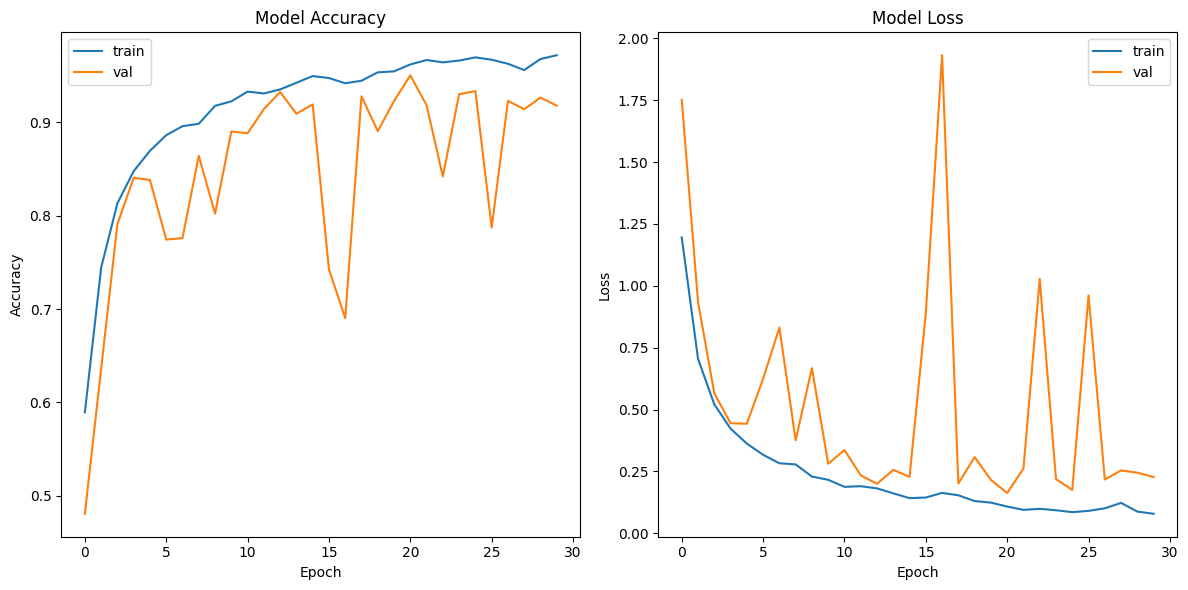

In [ ]:
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

plt.show()


In [ ]:
loss, acc = model.evaluate(X_test_pad, Y_test, verbose=1)[:2]

294/294 [==============================] - 2s 7ms/step - loss: 0.2275 - acc: 0.9181 - recall_1: 0.9141 - precision_1: 0.9260 - auc_1: 0.9937 - true_positives_1: 8581.0000 - true_negatives_1: 55636.0000 - false_negatives_1: 806.0000 - false_positives_1: 686.0000


294/294 [==============================] - 1s 4ms/step


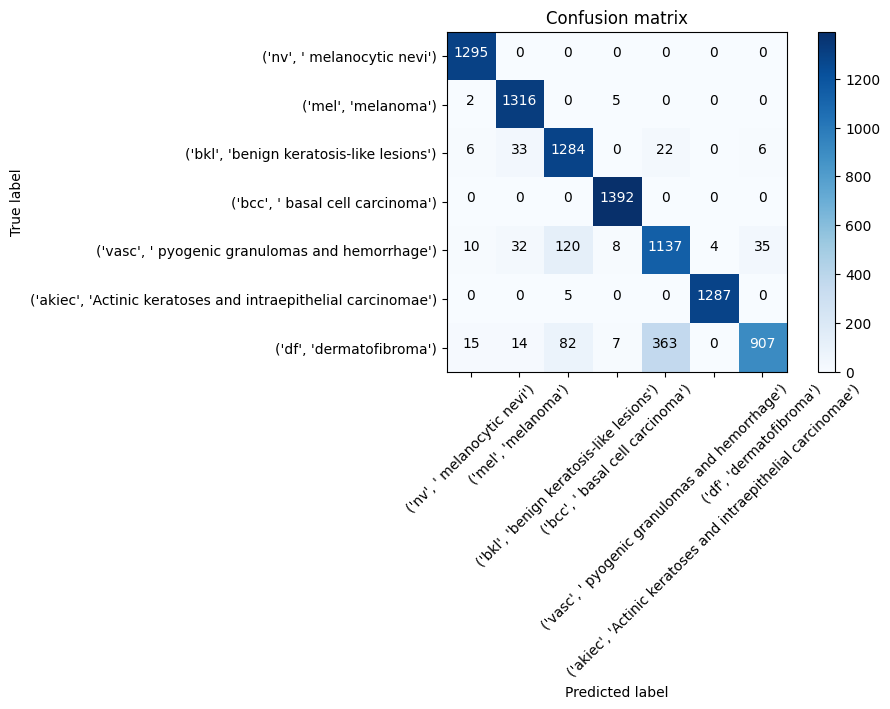

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test_pad)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
confusion_mtx = confusion_matrix(np.argmax(Y_test,axis=1), Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values())

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
Y_pred = np.argmax(model.predict(X_test_pad),axis=1)
print(classification_report(np.float32(np.argmax(Y_test,axis=1)), Y_pred.round()))
print('Classification Report after transfer learning')

294/294 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1295
         1.0       0.94      0.99      0.97      1323
         2.0       0.86      0.95      0.90      1351
         3.0       0.99      1.00      0.99      1392
         4.0       0.75      0.84      0.79      1346
         5.0       1.00      1.00      1.00      1292
         6.0       0.96      0.65      0.78      1388

    accuracy                           0.92      9387
   macro avg       0.92      0.92      0.92      9387
weighted avg       0.92      0.92      0.92      9387

Classification Report after transfer learning
